### K-means clustering
- **Task** :practice K-means clustering. Using the `.inertia_` attribute to compare models with different numbers of clusters, k.
- target variable in the diabetes dataset is progression

In [1]:
import pandas as pd
from sklearn.cluster import KMeans

In [3]:
diabetes = pd.read_csv('data/diabetes.csv')

# Create feature matrix
X = diabetes.drop("progression", axis=1)

# Instantiate
kmeans = KMeans(n_clusters=2, random_state=123)

# Fit
fit = kmeans.fit(X)

# Print inertia
print("Sum of squared distances for 2 clusters is", kmeans.inertia_)

Sum of squared distances for 2 clusters is 7.187000018583656


#### Instantiate a 5 cluster k-means and print its inertia.


In [4]:
# Instantiate
kmeans = KMeans(n_clusters=5, random_state=123)

# Fit
fit = kmeans.fit(X)

# Print inertia
print("Sum of squared distances for 5 clusters is", kmeans.inertia_)

Sum of squared distances for 5 clusters is 5.554112564296045


#### Fit the feature matrix to a 10-cluster k-means and print its inertia.

In [5]:
# Instantiate
kmeans = KMeans(n_clusters=10, random_state=123)

# Fit
fit = kmeans.fit(X)

# Print inertia
print("Sum of squared distances for 10 clusters is", kmeans.inertia_)

Sum of squared distances for 10 clusters is 4.36463117911814


#### Fit the feature matrix to a 20-cluster k-means and print its inertia.

In [6]:
# Instantiate
kmeans = KMeans(n_clusters=20, random_state=123)

# Fit
fit = kmeans.fit(X)

# Print inertia
print("Sum of squared distances for 20 clusters is", kmeans.inertia_)

Sum of squared distances for 20 clusters is 3.516404544955704


## Which value of k returned the lowest inertia? : k=20

### Hierarchical agglomerative clustering
- We saw how the number of clusters while performing K-means clustering could impact our results .
- However, another clustering model we can use is hierarchical agglomerative clustering. In Python, we can derive the optimal number of clusters for this technique both visually and mathematically. We will use the scipy and sklearn modules to do both.
- selecting the optimal number of clusters from a dendrogram depends on both the linkage criteria and distance threshold. Here, we'll create a dendrogram with the X matrix from diabetes, then extend an imaginary line at length 1.50, counting the number of vertical lines crossed to represent the optimal number of clusters for our hierarchical clustering algorithm going forward.

In [8]:
# Import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

#### Create a dendrogram on X using the ward linkage method.

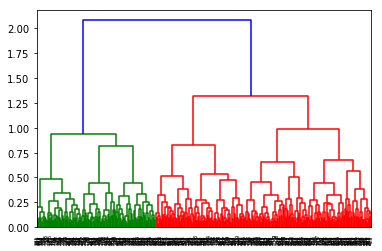

In [9]:
# Create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()

#### Instantiate an agglomerative clustering  cluster object, then fit it to the data matrix X.

In [12]:
# Create clusters and fit
hc = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward')
hc.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func='deprecated')

#### Print the number of clusters automatically chosen through agglomerative clustering.

In [14]:
# Print number of clusters
print(hc.n_clusters)

2


### Both the dendrogram and the AgglomerativeClustering() algorithm selected 2 clusters with diabetes, even though the .inertia_ using KMeans was the highest with n_clusters=20. We'll investigate this more on how to select the best value for k!

## Choosing the optimal number of clusters particularly for K-Means

### Silhouette method
- **Task**:we will be using the silhoutte_score() function from sklearn.metrics on K-means algorithms ran on the diabetes DataFrame in order to perform the Silhouette method for finding the optimal number of clusters. Note we will be using euclidian distance when calculating the score as it ensures comparability between it and the Elbow method.


In [15]:
# Import modules
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#### Instantiate, fit and predict a K-Means object for each number of clusters ranging from 2 to 8.
#### Print the silhouette score for each iteration of clustering.

In [16]:
# For loop
for n_clusters in range(2,9):
    kmeans = KMeans(n_clusters=n_clusters)
    # Fit and predict your k-Means object
    preds = kmeans.fit_predict(X)
    score = silhouette_score(X, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.23698717031681762)
For n_clusters = 3, silhouette score is 0.15243304093216897)
For n_clusters = 4, silhouette score is 0.13869124578567807)
For n_clusters = 5, silhouette score is 0.14219201450915492)
For n_clusters = 6, silhouette score is 0.1426882658128913)
For n_clusters = 7, silhouette score is 0.14004858788249314)
For n_clusters = 8, silhouette score is 0.1408921532412176)


### So the highest silhouette score for the diabetes dataset is with n_clusters=2

## Elbow method
- The silhouette score and elbow methods provide validation to the results we see from each. In a machine learning interview setting, we may be asked about one or the other but discussing the specifics of one in the context of the other would contribute greatly to our answer.
- **Task** :for each k value, we will initialize a K-means model and use the inertia_ attribute to identify the sum of squared distances of samples to the nearest cluster center that, when plotted, appears to be an 'elbow' in the plot.

#### Create an empty list named  `sum_of_squared_distances`

In [17]:
# Create empty list
sum_of_squared_distances = []

#### Instantiate and fit a K-Means object for each number of clusters ranging from 1 to 14.
#### Append the inertia score for each iteration of K-Means to sum_of_squared_distances.


In [18]:
# Create for loop
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(X)
    sum_of_squared_distances.append(kmeans.inertia_)

#### Create a plot with the number of clusters on the x-axis, and the sum of squared distances on the y-axis.

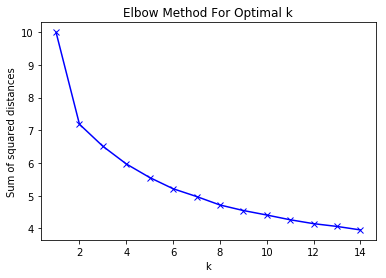

In [19]:
# Plot
plt.plot(range(1,15), sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### Conclusion : The AgglomerativeClustering(), dendrogram, silhouette score, and elbow method all agree! The best value for k with the diabetes dataset is 2! And really that makes sense if you think about it. The target variable progression, even though it is continuous, can be thought of as belonging to one of 2 groups. When compared to a previous baseline measurement, a given person's diabetes has either progressed or it hasn't!